<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.3
# *KNN classification Lab*

**In this lab, we will:**
- Practice KNN classification on a dataset of breast cancer.
- Predict the `diagnoosis` of a patient from predictor variables of your choice.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [36]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

import gc


from itertools import combinations

%matplotlib inline
pd.set_option('expand_frame_repr', False)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [39]:
#breast_cancer_csv = '../../DATA/breast-cancer-wisconsin-data.csv'
#data_csv = r"D:\Clivia's Notes\IOD_data\Datasets 1\breast-cancer-wisconsin-data.csv"

data_csv  = '/content/drive/MyDrive/IOD/breast-cancer-wisconsin-data.csv'
data  = pd.read_csv(data_csv, index_col = 'id')

In [40]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [41]:
data.id.nunique()

AttributeError: ignored

In [ ]:
data.info()

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [ ]:
data.shape

In [ ]:
data.isnull().sum()

In [42]:
data['diagnosis'].value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

In [43]:
data['diagnosis'].value_counts(normalize = True) * 100

B    62.741652
M    37.258348
Name: diagnosis, dtype: float64

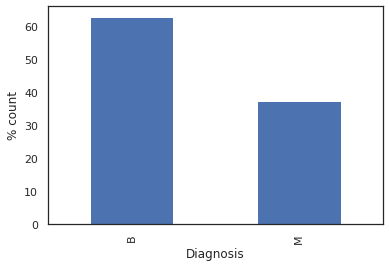

In [44]:
(data['diagnosis'].value_counts(normalize = True) * 100).plot(kind='bar')
plt.xlabel('Diagnosis')
plt.ylabel('% count')
plt.show()

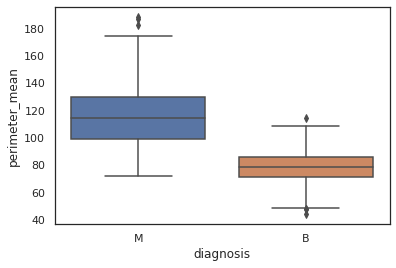

In [45]:
# compare distribution of perimeter_mean between B and M groups
sns.boxplot(x = 'diagnosis', y = 'perimeter_mean', data = data)
plt.show()

In [46]:
#sns.pairplot(data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


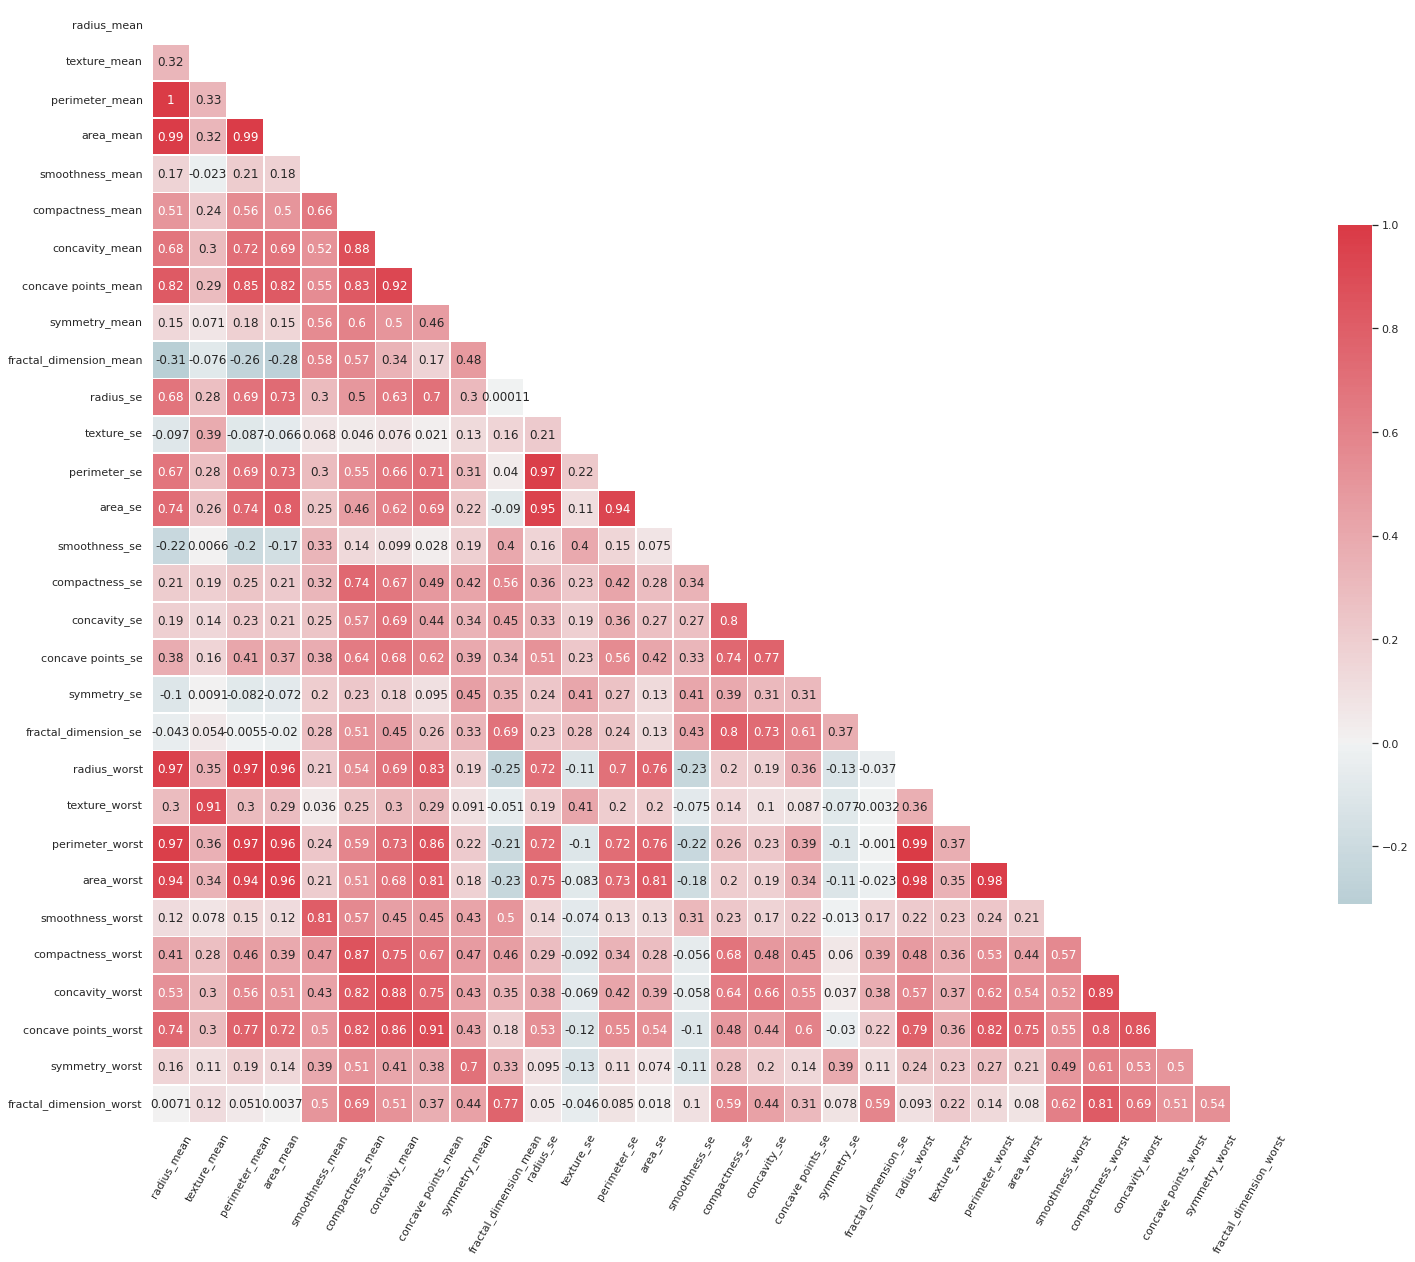

In [47]:
sns.set(style='white')
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(25,25))

cmap =  sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(data.corr(), mask = mask, cmap = cmap, vmax=1, center = 0, square = True, linewidths = 0.8, cbar_kws = {'shrink': 0.5}, annot = True)
plt.xticks(rotation =60)
plt.show()

In [48]:
data.columns


Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [49]:
mean_only_columns = []
for column in data.columns:
    if '_mean' in column or 'diagnosis' in column:
        mean_only_columns.append(column)
print(mean_only_columns)

['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


In [52]:
selected_data = data[mean_only_columns]
selected_data.head

<bound method NDFrame.head of          diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  concavity_mean  concave points_mean  symmetry_mean  fractal_dimension_mean
id                                                                                                                                                                                     
842302           M        17.99         10.38          122.80     1001.0          0.11840           0.27760         0.30010              0.14710         0.2419                 0.07871
842517           M        20.57         17.77          132.90     1326.0          0.08474           0.07864         0.08690              0.07017         0.1812                 0.05667
84300903         M        19.69         21.25          130.00     1203.0          0.10960           0.15990         0.19740              0.12790         0.2069                 0.05999
84348301         M        11.42         20.38     

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


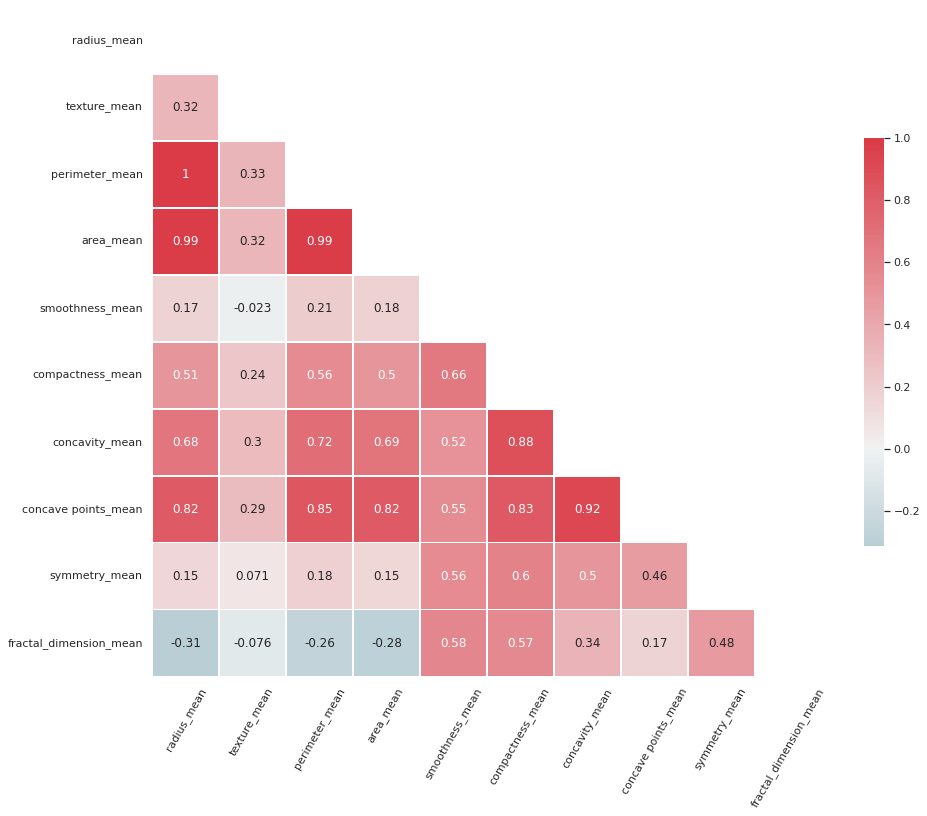

In [56]:
sns.set(style='white')
mask = np.zeros_like(selected_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15,15))

cmap =  sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(selected_data.corr(), mask = mask, cmap = cmap, vmax=1, center = 0, square = True, linewidths = 0.8, cbar_kws = {'shrink': 0.5}, annot = True)
plt.xticks(rotation =60)
plt.show()

In [66]:
# find correlations between dataframe features and convert to a format
def find_feature_correlation(df):
    var1 = []
    var2 = []
    pearsons = []
    pvalues = []
    
    for comb in combinations(df.columns.tolist(), 2):
        v1 = comb[0]
        var1.append(v1)
        
        v2 = comb[1]
        var2.append(v2)
        
        p,p_value = stats.pearsonr(df[v1], df[v2])
        pearsons.append(p)
        pvalues.append(p_value)
        
    corr_df = pd.DataFrame({'Feature1': var1,
                            'Feature2': var2,
                            'P': pearsons,
                            'p_value': pvalues})
    return corr_df

In [67]:
list(combinations(selected_data.columns.tolist(),2))

[('diagnosis', 'radius_mean'),
 ('diagnosis', 'texture_mean'),
 ('diagnosis', 'perimeter_mean'),
 ('diagnosis', 'area_mean'),
 ('diagnosis', 'smoothness_mean'),
 ('diagnosis', 'compactness_mean'),
 ('diagnosis', 'concavity_mean'),
 ('diagnosis', 'concave points_mean'),
 ('diagnosis', 'symmetry_mean'),
 ('diagnosis', 'fractal_dimension_mean'),
 ('radius_mean', 'texture_mean'),
 ('radius_mean', 'perimeter_mean'),
 ('radius_mean', 'area_mean'),
 ('radius_mean', 'smoothness_mean'),
 ('radius_mean', 'compactness_mean'),
 ('radius_mean', 'concavity_mean'),
 ('radius_mean', 'concave points_mean'),
 ('radius_mean', 'symmetry_mean'),
 ('radius_mean', 'fractal_dimension_mean'),
 ('texture_mean', 'perimeter_mean'),
 ('texture_mean', 'area_mean'),
 ('texture_mean', 'smoothness_mean'),
 ('texture_mean', 'compactness_mean'),
 ('texture_mean', 'concavity_mean'),
 ('texture_mean', 'concave points_mean'),
 ('texture_mean', 'symmetry_mean'),
 ('texture_mean', 'fractal_dimension_mean'),
 ('perimeter_mean

In [71]:
cancer_corr = find_feature_correlation(selected_data.select_dtypes(np.number))   
cancer_corr
# need to add select_dtypes(np.number) to avoid error of float plus string

,Feature1,Feature2,P,p_value
0,radius_mean,texture_mean,0.323782,2.360374e-15
1,radius_mean,perimeter_mean,0.997855,0.000000e+00
2,radius_mean,area_mean,0.987357,0.000000e+00
3,radius_mean,smoothness_mean,0.170581,4.312577e-05
4,radius_mean,compactness_mean,0.506124,2.414237e-38
5,radius_mean,concavity_mean,0.676764,1.907202e-77
6,radius_mean,concave points_mean,0.822529,4.350747e-141
7,radius_mean,symmetry_mean,0.147741,4.064650e-04
8,radius_mean,fractal_dimension_mean,-0.311631,2.795452e-14
9,texture_mean,perimeter_mean,0.329533,7.041961e-16


In [72]:
# sort rows by descending values of P
cancer_corr[cancer_corr['P'] > 0.7]

,Feature1,Feature2,P,p_value
1,radius_mean,perimeter_mean,0.997855,0.000000e+00
2,radius_mean,area_mean,0.987357,0.000000e+00
6,radius_mean,concave points_mean,0.822529,4.350747e-141
17,perimeter_mean,area_mean,0.986507,0.000000e+00
20,perimeter_mean,concavity_mean,0.716136,1.322967e-90
21,perimeter_mean,concave points_mean,0.850977,1.047656e-160
27,area_mean,concave points_mean,0.823269,1.491019e-141
35,compactness_mean,concavity_mean,0.883121,1.623002e-188
36,compactness_mean,concave points_mean,0.831135,1.240590e-146
39,concavity_mean,concave points_mean,0.921391,6.788791e-235


### 3. Set up the `diagnosis` variable as your target. How many classes are there?

In [74]:
# Set up target 
y = selected_data['diagnosis']
y

id
842302      M
842517      M
84300903    M
84348301    M
84358402    M
           ..
926424      M
926682      M
926954      M
927241      M
92751       B
Name: diagnosis, Length: 569, dtype: object

### 4. What is the baseline accuracy?

In [76]:
y.value_counts(normalize = True)

B    0.627417
M    0.372583
Name: diagnosis, dtype: float64

### 5. Choose features to be your predictor variables and set up your X.

In [77]:
cancer_corr[cancer_corr['P'] > 0.7]

,Feature1,Feature2,P,p_value
1,radius_mean,perimeter_mean,0.997855,0.000000e+00
2,radius_mean,area_mean,0.987357,0.000000e+00
6,radius_mean,concave points_mean,0.822529,4.350747e-141
17,perimeter_mean,area_mean,0.986507,0.000000e+00
20,perimeter_mean,concavity_mean,0.716136,1.322967e-90
21,perimeter_mean,concave points_mean,0.850977,1.047656e-160
27,area_mean,concave points_mean,0.823269,1.491019e-141
35,compactness_mean,concavity_mean,0.883121,1.623002e-188
36,compactness_mean,concave points_mean,0.831135,1.240590e-146
39,concavity_mean,concave points_mean,0.921391,6.788791e-235


In [78]:
# ANSWER
feature_columns = []
excluded_columns = ['diagnosis', 'area_mean', 'radius_mean', 'concavity_mean', 'compact_points_mean']
# exclude targe column, high correlated columns

for column in selected_data.columns:
  if column not in excluded_columns:
    feature_columns.append(column)

In [79]:
feature_columns 

['texture_mean',
 'perimeter_mean',
 'smoothness_mean',
 'compactness_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean']

In [81]:
X = selected_data[feature_columns]
X

,texture_mean,perimeter_mean,smoothness_mean,compactness_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
id,,,,,,,
842302,10.38,122.80,0.11840,0.27760,0.14710,0.2419,0.07871
842517,17.77,132.90,0.08474,0.07864,0.07017,0.1812,0.05667
84300903,21.25,130.00,0.10960,0.15990,0.12790,0.2069,0.05999
84348301,20.38,77.58,0.14250,0.28390,0.10520,0.2597,0.09744
84358402,14.34,135.10,0.10030,0.13280,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...
926424,22.39,142.00,0.11100,0.11590,0.13890,0.1726,0.05623
926682,28.25,131.20,0.09780,0.10340,0.09791,0.1752,0.05533
926954,28.08,108.30,0.08455,0.10230,0.05302,0.1590,0.05648


### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [83]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [84]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
# ANSWER
# Make an instance of a KNeighborsClassifier object with 1 neighbor

# fit on the unstandardized data:

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [85]:
y_pred_class = knn.predict(X)

from sklearn import metrics

print(metrics.accuracy_score(y, y_pred_class))

1.0


In [ ]:
# ANSWER
# predict the response values for the observations in X ("test the model")
# store the predicted response values

### 8. Create a 80-20 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [ ]:
# ANSWER
# STEP 1: split X and y into training and testing sets (using random_state for reproducibility)

# STEP 2: train the model on the training set (using K=1)

# STEP 3: test the model on the testing set, and check the accuracy

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

knn_1= KNeighborsClassifier(n_neighbors = 1)
knn_1.fit(X_train, y_train)

y_pred_class = knn_1.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

0.9385964912280702



### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [ ]:
# ANSWER
# Create an instance of KNeighborsClassifier where n_neighbors = number of rows in the training data

# Fit Train Data

# Print accuracy_score

In [89]:
k_n = X_train.shape[0]

knn_n = KNeighborsClassifier(n_neighbors = k_n)
knn_n.fit(X_train, y_train)
y_pred_class = knn_n.predict(X_test)

print(metrics.accuracy_score(y_test, y_pred_class))

0.6228070175438597


### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [ ]:
# ANSWER
# plot test accuracy by number of neighbors:



In [91]:
X_train.shape

(455, 7)

In [92]:
X_train.shape[0]

455

In [93]:
X_train.shape[0] + 1

456

In [90]:
list(range(1, X_train.shape[0] + 1))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [95]:
test_acc = []

for i in range(1, X_train.shape[0] + 1):
  knn_i = KNeighborsClassifier(n_neighbors = i)
  knn_i.fit(X_train, y_train)
  knn_n = KNeighborsClassifier(n_neighbors = k_n)
  test_acc.append(knn_i.score(X_test, y_test))


In [99]:
test_acc_1 = []

for i in range(1, X_train.shape[0] + 1):
  knn_i = KNeighborsClassifier(n_neighbors = i)
  knn_i.fit(X_train, y_train)
  knn_n = KNeighborsClassifier(n_neighbors = k_n)
  test_acc_1.append(metrics.accuracy_score(y_test, y_pred_class))


In [100]:
test_acc_1 

[0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175438597,
 0.6228070175

In [96]:
test_acc

[0.9385964912280702,
 0.9210526315789473,
 0.9298245614035088,
 0.956140350877193,
 0.9122807017543859,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9122807017543859,
 0.9298245614035088,
 0.9210526315789473,
 0.9298245614035088,
 0.9298245614035088,
 0.9385964912280702,
 0.9210526315789473,
 0.9210526315789473,
 0.9210526315789473,
 0.9298245614035088,
 0.9298245614035088,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9385964912280702,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9298245614035088,
 0.9210526315789473,
 0.9210526315789473,
 0.9298245614035088,
 0.92105263157

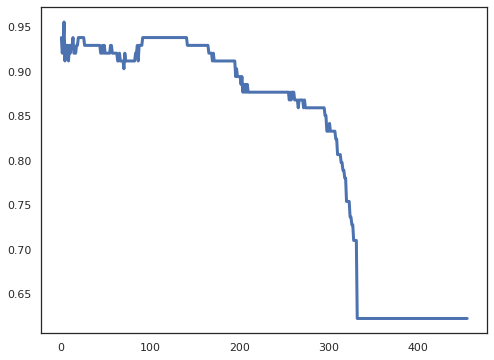

In [97]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(list(range(1, X_train.shape[0] + 1)), test_acc, lw = 3.)
plt.show()

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.


In [ ]:
# ANSWER

In [106]:
from sklearn.model_selection import cross_val_score

folds = 5
max_neighbors =np.floor(X.shape[0] - X.shape[0]/5.)

print(max_neighbors)

test_acc_ik= []

for i in range(1, int(max_neighbors)):
  knn_ik = KNeighborsClassifier(n_neighbors = i)
  test_acc_ik.append(np.mean(cross_val_score(knn_ik, X, y, cv = 5)))

print(max(test_acc_ik))

455.0
0.9068622884645242


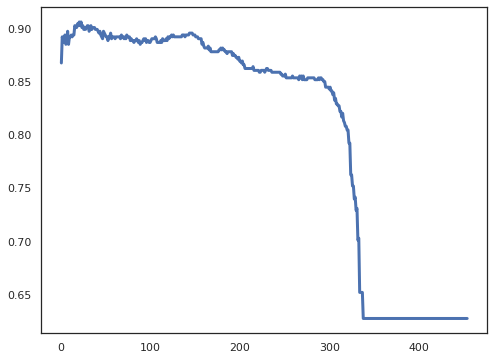

In [107]:
fig, ax = plt.subplots(figsize = (8 , 6))
ax.plot(list(range(1, int(max_neighbors))), test_acc_ik, lw = 3.)
plt.show()

usually is the square of the observation, which is 24 around


### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [ ]:
# ANSWER
# Standarize X

In [109]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)


In [ ]:
# ANSWER
# plot test accuracy by number of neighbors:

In [116]:
test_acc_std = []

for i in range(1, int(max_neighbors)):
  knn_std = KNeighborsClassifier(n_neighbors = i)
  test_acc_std.append(np.mean(cross_val_score(knn_std, Xs, y, cv = 5)))

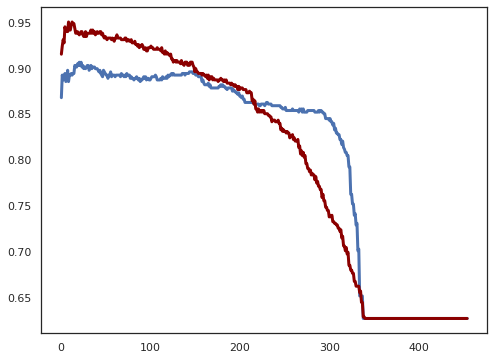

In [117]:
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(list(range(1, int(max_neighbors))), test_acc_ik, lw = 3.)
ax.plot(list(range(1, int(max_neighbors))), test_acc_std, lw = 3., color = 'darkred')
plt.show()

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)



---



---



> > > > > > > > > © 2022 Institute of Data


---



---



